In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_df = pd.read_csv('../data/test (1).csv')
print(f"Test shape: {test_df.shape}")


Test shape: (1459, 80)


In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
missing = test_df.isnull().sum().sort_values(ascending = False)
missing_percent = (missing/test_df.shape[0]) * 100
missing_df = pd.DataFrame({'MissingCount': missing, 'MissingPercent': missing_percent})
missing_df = missing_df[missing_df.MissingCount > 0]
print(missing_df)

              MissingCount  MissingPercent
PoolQC                1456       99.794380
MiscFeature           1408       96.504455
Alley                 1352       92.666210
Fence                 1169       80.123372
MasVnrType             894       61.274846
FireplaceQu            730       50.034270
LotFrontage            227       15.558602
GarageYrBlt             78        5.346127
GarageCond              78        5.346127
GarageFinish            78        5.346127
GarageQual              78        5.346127
GarageType              76        5.209047
BsmtCond                45        3.084304
BsmtQual                44        3.015764
BsmtExposure            44        3.015764
BsmtFinType1            42        2.878684
BsmtFinType2            42        2.878684
MasVnrArea              15        1.028101
MSZoning                 4        0.274160
BsmtHalfBath             2        0.137080
Utilities                2        0.137080
Functional               2        0.137080
BsmtFullBat

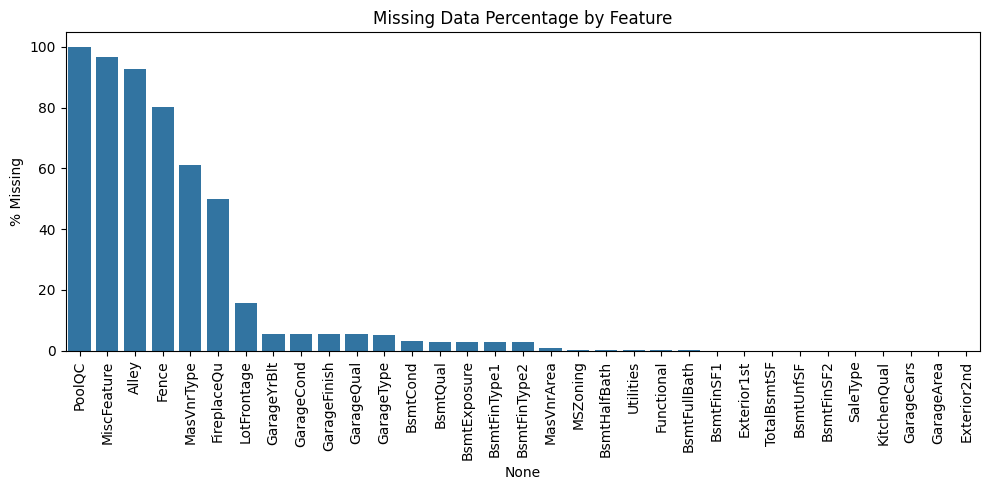

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=missing_df.index,
    y=missing_df.MissingPercent
)
plt.xticks(rotation=90)
plt.ylabel('% Missing')
plt.title('Missing Data Percentage by Feature')
plt.tight_layout()
plt.show()

## Filling Missing values

In [6]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [7]:
# Drop features with more than more than 50% missing data
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'GarageYrBlt', 'MasVnrArea']
test_df = test_df.drop(cols_to_drop, axis=1)


# Impute categorical features where NA = most frequent value
for col in ['FireplaceQu', 'GarageQual', 'GarageFinish', 'GarageType', 
            'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 
            'BsmtQual', 'BsmtFinType1', 'Electrical', 'MSZoning']:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])



In [8]:
test_df.isnull().sum().sort_values(ascending = False).head(15)

Utilities       2
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
BsmtFinSF1      1
Exterior1st     1
TotalBsmtSF     1
Exterior2nd     1
BsmtFinSF2      1
KitchenQual     1
GarageCars      1
SaleType        1
GarageArea      1
BsmtUnfSF       1
LotFrontage     0
dtype: int64

In [9]:
# Impute with the most common or median value (you can adapt this as you wish):
num_fill_cols = ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'TotalBsmtSF', 
                 'BsmtFinSF2', 'GarageCars', 'GarageArea', 'BsmtUnfSF']
cat_fill_cols = ['Utilities', 'Functional', 'Exterior1st', 'Exterior2nd', 
                 'KitchenQual', 'SaleType']

# Numeric columns: fill with median
for col in num_fill_cols:
    test_df[col] = test_df[col].fillna(test_df[col].median())

# Categorical columns: fill with most frequent (mode)
for col in cat_fill_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])


In [10]:
test_df.isnull().sum().sort_values(ascending = False)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64

In [11]:
test_df.isnull().sum().sort_values(ascending = False)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64

In [12]:
test_df.shape

(1459, 73)

In [15]:
test_df.to_csv('test_df_modified.csv',index=False)